In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

import datasets

In [204]:

data_x1 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_1.csv")
data_x2 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_2.csv")
data_x3 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_3.csv")
data_x4 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_4.csv")
data_x5 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_5.csv")
data_source = pd.read_csv("calibration_and_background_method1/spectrum_source.csv")
data_background = pd.read_csv("calibration_and_background_method1/spectrum_background.csv")

data_y1 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_1.csv")
data_y2 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_2.csv")
data_y3 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_3.csv")
data_y4 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_4.csv")


all functions needed in program

In [205]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 211.8 and i < 215.7:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

def remove_background(dataset, dataset_2):
    data = []
    
    for i, j in zip(dataset, dataset_2):
        x = i - j
        data.append(x)
    
    return data

def add_counts(dataset_1, dataset_2):
    total_counts = []
    
    for i, j in zip(dataset_1, dataset_2):
        total_counts.append(i + j)
        
    return total_counts

def scaling(dataset, scaling_factor):
    data = []
    for i in dataset:
        data.append(i * scaling_factor)
    return data
    

remove background from measured data

In [206]:
pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]
counts_tot_background = add_counts(counts_background_A, counts_background_B)

counts_A_x1 = remove_background(data_x1["counts_ch_A"], counts_background_A)
counts_B_x1 = remove_background(data_x1["counts_ch_B"], counts_background_B)
counts_total_x1 = add_counts(counts_A_x1, counts_B_x1)

counts_A_x2 = remove_background(data_x2["counts_ch_A"], counts_background_A)
counts_B_x2 = remove_background(data_x2["counts_ch_B"], counts_background_B)
counts_total_x2 = add_counts(counts_A_x2, counts_B_x2)

counts_A_x3 = remove_background(data_x3["counts_ch_A"], counts_background_A)
counts_B_x3 = remove_background(data_x3["counts_ch_B"], counts_background_B)
counts_total_x3 = add_counts(counts_A_x3, counts_B_x3)

counts_A_x4 = remove_background(data_x4["counts_ch_A"], counts_background_A)
counts_B_x4 = remove_background(data_x4["counts_ch_B"], counts_background_B)
counts_total_x4 = add_counts(counts_A_x4, counts_B_x4)

counts_A_x5 = remove_background(data_x5["counts_ch_A"], counts_background_A)
counts_B_x5 = remove_background(data_x5["counts_ch_B"], counts_background_B)
counts_total_x5 = add_counts(counts_A_x5, counts_B_x5)

pulseheights = data_source["pulseheight"]
counts_A_source = remove_background(data_source["counts_ch_A"], counts_background_A)
counts_B_source = remove_background(data_source["counts_ch_B"], counts_background_B)
counts_total_source = add_counts(counts_A_source, counts_B_source)


In [207]:

counts_A_y1 = remove_background(data_y1["counts_ch_A"], counts_background_A)
counts_B_y1 = remove_background(data_y1["counts_ch_B"], counts_background_B)
counts_total_y1 = add_counts(counts_A_y1, counts_B_y1)

counts_A_y2 = remove_background(data_y2["counts_ch_A"], counts_background_A)
counts_B_y2 = remove_background(data_y2["counts_ch_B"], counts_background_B)
counts_total_y2 = add_counts(counts_A_y2, counts_B_y2)

counts_A_y3 = remove_background(data_y3["counts_ch_A"], counts_background_A)
counts_B_y3 = remove_background(data_y3["counts_ch_B"], counts_background_B)
counts_total_y3 = add_counts(counts_A_y3, counts_B_y3)

counts_A_y4 = remove_background(data_y4["counts_ch_A"], counts_background_A)
counts_B_y4 = remove_background(data_y4["counts_ch_B"], counts_background_B)
counts_total_y4 = add_counts(counts_A_y4, counts_B_y4)

Calculate scaling factor

In [208]:
scaling_factor = max(counts_A_source) / max(counts_B_source)
print(scaling_factor)

1.1898332009531374


apply scaling factor to data sets

In [209]:
counts_B_x1 = scaling(counts_B_x1, scaling_factor)
counts_B_x2 = scaling(counts_B_x2, scaling_factor)
counts_B_x3 = scaling(counts_B_x3, scaling_factor)
counts_B_x4 = scaling(counts_B_x4, scaling_factor)
counts_B_x5 = scaling(counts_B_x5, scaling_factor)

counts_B_y1 = scaling(counts_B_y1, scaling_factor)
counts_B_y2 = scaling(counts_B_y2, scaling_factor)
counts_B_y3 = scaling(counts_B_y3, scaling_factor)
counts_B_y4 = scaling(counts_B_y4, scaling_factor)

counts_B_source = scaling(counts_B_source, scaling_factor)

adjust data to 511 KeV peak to look at intensity coming only from positron electron annihilation for x and y measurements

In [210]:

_, counts_A_x1 = adjust(pulseheights, counts_A_x1)
_, counts_B_x1 = adjust(pulseheights, counts_B_x1)
_, counts_A_x2 = adjust(pulseheights, counts_A_x2)
_, counts_B_x2 = adjust(pulseheights, counts_B_x2)
_, counts_A_x3 = adjust(pulseheights, counts_A_x3)
_, counts_B_x3 = adjust(pulseheights, counts_B_x3)
_, counts_A_x4 = adjust(pulseheights, counts_A_x4)
_, counts_B_x4 = adjust(pulseheights, counts_B_x4)
_, counts_A_x5 = adjust(pulseheights, counts_A_x5)
_, counts_B_x5 = adjust(pulseheights, counts_B_x5)

x1_counts = [sum(counts_A_x1) + sum(counts_B_x1)]
x2_counts = [sum(counts_A_x2) + sum(counts_B_x2)]
x3_counts = [sum(counts_A_x3) + sum(counts_B_x3)]
x4_counts = [sum(counts_A_x4) + sum(counts_B_x4)]
x5_counts = [sum(counts_A_x5) + sum(counts_B_x5)]

x_counts = [x1_counts, x2_counts, x3_counts, x4_counts, x5_counts]



In [211]:

_, counts_A_y1 = adjust(pulseheights, counts_A_y1)
_, counts_B_y1 = adjust(pulseheights, counts_B_y1)
_, counts_A_y2 = adjust(pulseheights, counts_A_y2)
_, counts_B_y2 = adjust(pulseheights, counts_B_y2)
_, counts_A_y3 = adjust(pulseheights, counts_A_y3)
_, counts_B_y3 = adjust(pulseheights, counts_B_y3)
_, counts_A_y4 = adjust(pulseheights, counts_A_y4)
_, counts_B_y4 = adjust(pulseheights, counts_B_y4)

y1_counts = [sum(counts_A_y1) + sum(counts_B_y1)]
y2_counts = [sum(counts_A_y2) + sum(counts_B_y2)]
y3_counts = [sum(counts_A_y3) + sum(counts_B_y3)]
y4_counts = [sum(counts_A_y4) + sum(counts_B_y4)]

y_counts = [y1_counts, y2_counts, y3_counts, y4_counts]


making heatmap with total amount of peak counts per x and y location

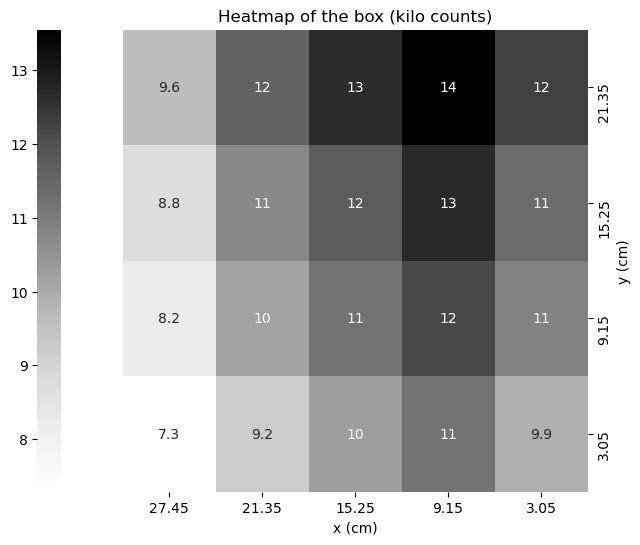

In [212]:
x_positions = np.array([3.05, 9.15, 15.25, 21.35, 27.45]) 
y_positions = np.array([3.05, 9.15, 15.25, 21.35])

# total amount of counts at location (xi, yi) is the sum of counts_xi and counts_yi
counts = np.array([
    [x1_counts[0] + y1_counts[0], x2_counts[0] + y1_counts[0], x3_counts[0] + y1_counts[0], 
     x4_counts[0] + y1_counts[0], x5_counts[0] + y1_counts[0]],  
    [x1_counts[0] + y2_counts[0], x2_counts[0] + y2_counts[0], x3_counts[0] + y2_counts[0], x4_counts[0]
     + y2_counts[0], x5_counts[0] + y2_counts[0]],  
    [x1_counts[0] + y3_counts[0], x2_counts[0] + y3_counts[0], x3_counts[0] + y3_counts[0], x4_counts[0]
     + y3_counts[0], x5_counts[0] + y3_counts[0]],  
    [x1_counts[0] + y4_counts[0], x2_counts[0] + y4_counts[0], x3_counts[0] + y4_counts[0], x4_counts[0]
     + y4_counts[0], x5_counts[0] + y4_counts[0]] 
])

# scale to kilo counts for easier reading
counts = counts / 1000

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box (kilo counts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")

plt.show()


Filtering out the intensity coming from dominant source (x = 9.15, y = 21.35) to find other 2 sources

In [213]:
counts_source =  (x2_counts[0] + y4_counts[0]) / 1000 #kilo counts
counts_source_box = []

# every x, y position dominant source as origin
ry_positions = [-18.3, -12.2, -6.1, 0]
rx_positions = [-6.1, 0, 6.1, 12.2, 18.3]

# calculating intensity at every point in box coming from dominant source (intensity goes off with 1 / r^2)
for y in ry_positions:
    for x in rx_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_source_box.append(counts_source ** 2 / (r ** 2 + counts_source))

counts_source_box = np.array(counts_source_box)
counts_source_box = np.array(counts_source_box).reshape(4, 5)

remove intensity from dominant source and plot heatmap

In [214]:
counts = counts - counts_source_box
counts = np.array(counts)
counts_sim = counts
print(counts_sim)
print(counts_sim[0][1])


[[ 9.42319984 10.66388147  9.78728403  8.86167482  7.01665013]
 [ 9.93742344 11.01817982 10.30150764  9.59894133  7.87409659]
 [ 9.30258229  9.06420256  9.66666649  9.80138452  8.29958268]
 [ 8.64120733  0.          9.00529152 10.45914566  9.11726908]]
10.66388147429952


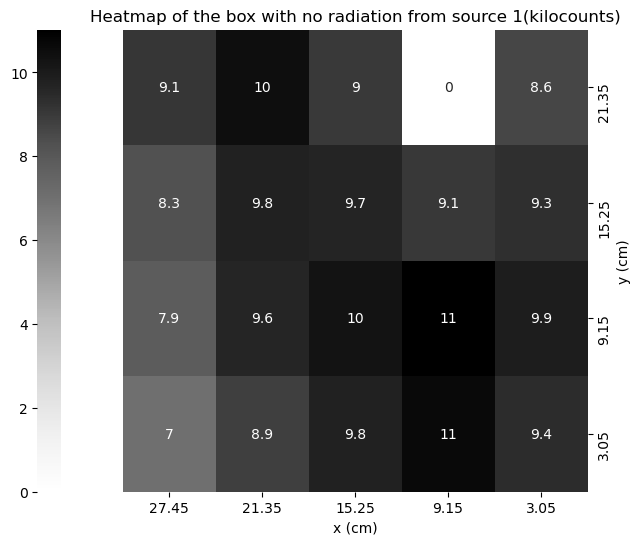

In [215]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

In [216]:
counts_source =  counts_sim[0][1]
counts_source_box = []

# every x, y position dominant source as origin
rx_positions = [-6.1, 0, 6.1, 12.2, 18.3]
ry_positions = [-6.1, 0, 6.1, 12.2]

# calculating intensity at every point in box coming from dominant source (intensity goes off with 1 / r^2)
for y in ry_positions:
    for x in rx_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_source_box.append(counts_source ** 2 / (r ** 2 + counts_source))

counts_source_box = np.array(counts_source_box)
counts_source_box = np.array(counts_source_box).reshape(4, 5)

In [217]:
counts = counts_sim - counts_source_box
counts = np.array(counts)
counts_sim = counts

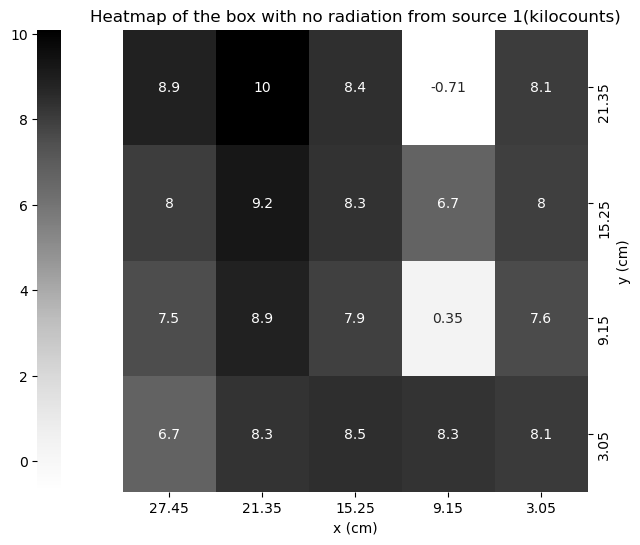

In [218]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box with no radiation from source 1(kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

same simulation but now for last source at other location to compare which location simulates intensity better

In [219]:
counts_source_1 =  29 # kilo counts
counts_1 = []
counts_source_2 =  24 # kilo counts
counts_2 = []

r1x_positions = [-6.1, 0, 6.1, 12.2, 18.3]
r1y_positions = [-6.1, 0, 6.1, 12.2]
r2x_positions = [-18.3, -12.2, -6.1, 0, 6.1]
r2y_positions = [-18.3, -12.2, -6.1, 0]

for y in r1y_positions:
    for x in r1x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_1.append(counts_source_1 ** 2 / (r ** 2 + counts_source_1))

for y in r2y_positions:
    for x in r2x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_2.append(counts_source_2 ** 2 / (r ** 2 + counts_source_2))

counts_1 = np.array(counts_1)
counts_1 = np.array(counts_1).reshape(4, 5)

counts_2 = np.array(counts_2)
counts_2 = np.array(counts_2).reshape(4, 5)

counts = counts_1 + counts_2


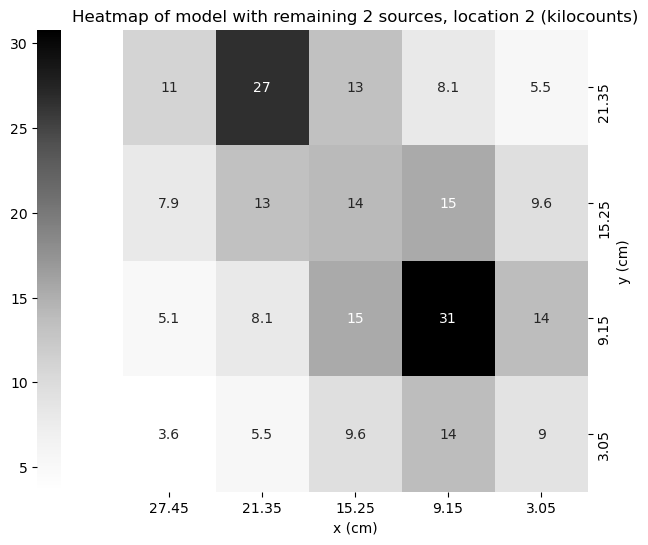

In [220]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of model with remaining 2 sources, location 2 (kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

In [221]:
counts_source_1 =  41 # kilo counts
counts_1 = []
counts_source_2 =  30 # kilo counts
counts_2 = []
counts_source_3 = 28
counts_3 = []

r1x_positions = [-6.1, 0, 6.1, 12.2, 18.3]
r1y_positions = [-18.3, -12.2, -6.1, 0]
r2x_positions = [-6.1, 0, 6.1, 12.2, 18.3]
r2y_positions = [-6.1, 0, 6.1, 12.2]
r3x_positions = [-18.3, -12.2, -6.1, 0, 6.1]
r3y_positions = [-18.3, -12.2, -6.1, 0]

for y in r1y_positions:
    for x in r1x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_1.append(counts_source_1 ** 2 / (r ** 2 + counts_source_1))

for y in r2y_positions:
    for x in r2x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_2.append(counts_source_2 ** 2 / (r ** 2 + counts_source_2))
        
for y in r3y_positions:
    for x in r3x_positions:
        r = np.sqrt(x ** 2 + y ** 2)
        counts_3.append(counts_source_3 ** 2 / (r ** 2 + counts_source_3))
        

counts_1 = np.array(counts_1)
counts_1 = np.array(counts_1).reshape(4, 5)

counts_2 = np.array(counts_2)
counts_2 = np.array(counts_2).reshape(4, 5)

counts_3 = np.array(counts_3)
counts_3 = np.array(counts_3).reshape(4, 5)

counts = counts_1 + counts_2 + counts_3
print(counts)

[[13.81183443 19.39497537 14.64778125  9.52968898  6.56276677]
 [22.32657796 41.26209606 24.45721567 14.4292046   9.33274469]
 [25.14274893 38.54697525 30.83799374 23.59205387 13.96223675]
 [27.81955184 50.46581734 37.68181345 39.60140715 18.24664192]]


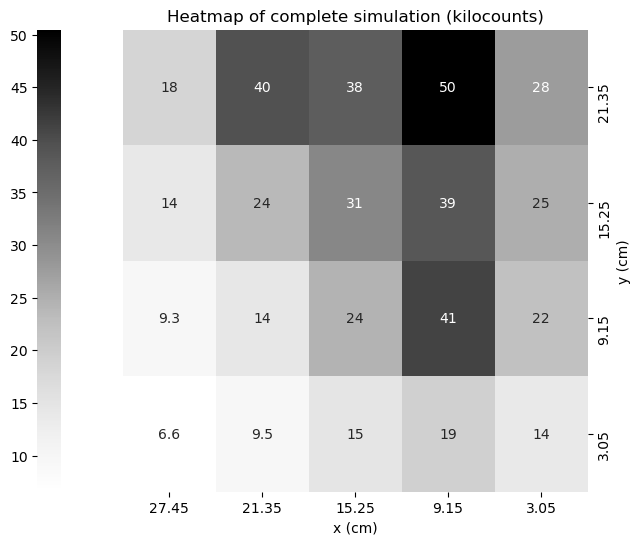

In [222]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap = "Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of complete simulation (kilocounts)")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()